In [1]:
! pip3 install diagrams

Defaulting to user installation because normal site-packages is not writeable
  Using cached diagrams-0.23.4-py3-none-any.whl (24.6 MB)
     |████████████████████████████████| 133 kB 2.1 MB/s eta 0:00:01
  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)
     |████████████████████████████████| 208 kB 6.5 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [2]:
!dot -V

dot - graphviz version 2.50.0 (0)


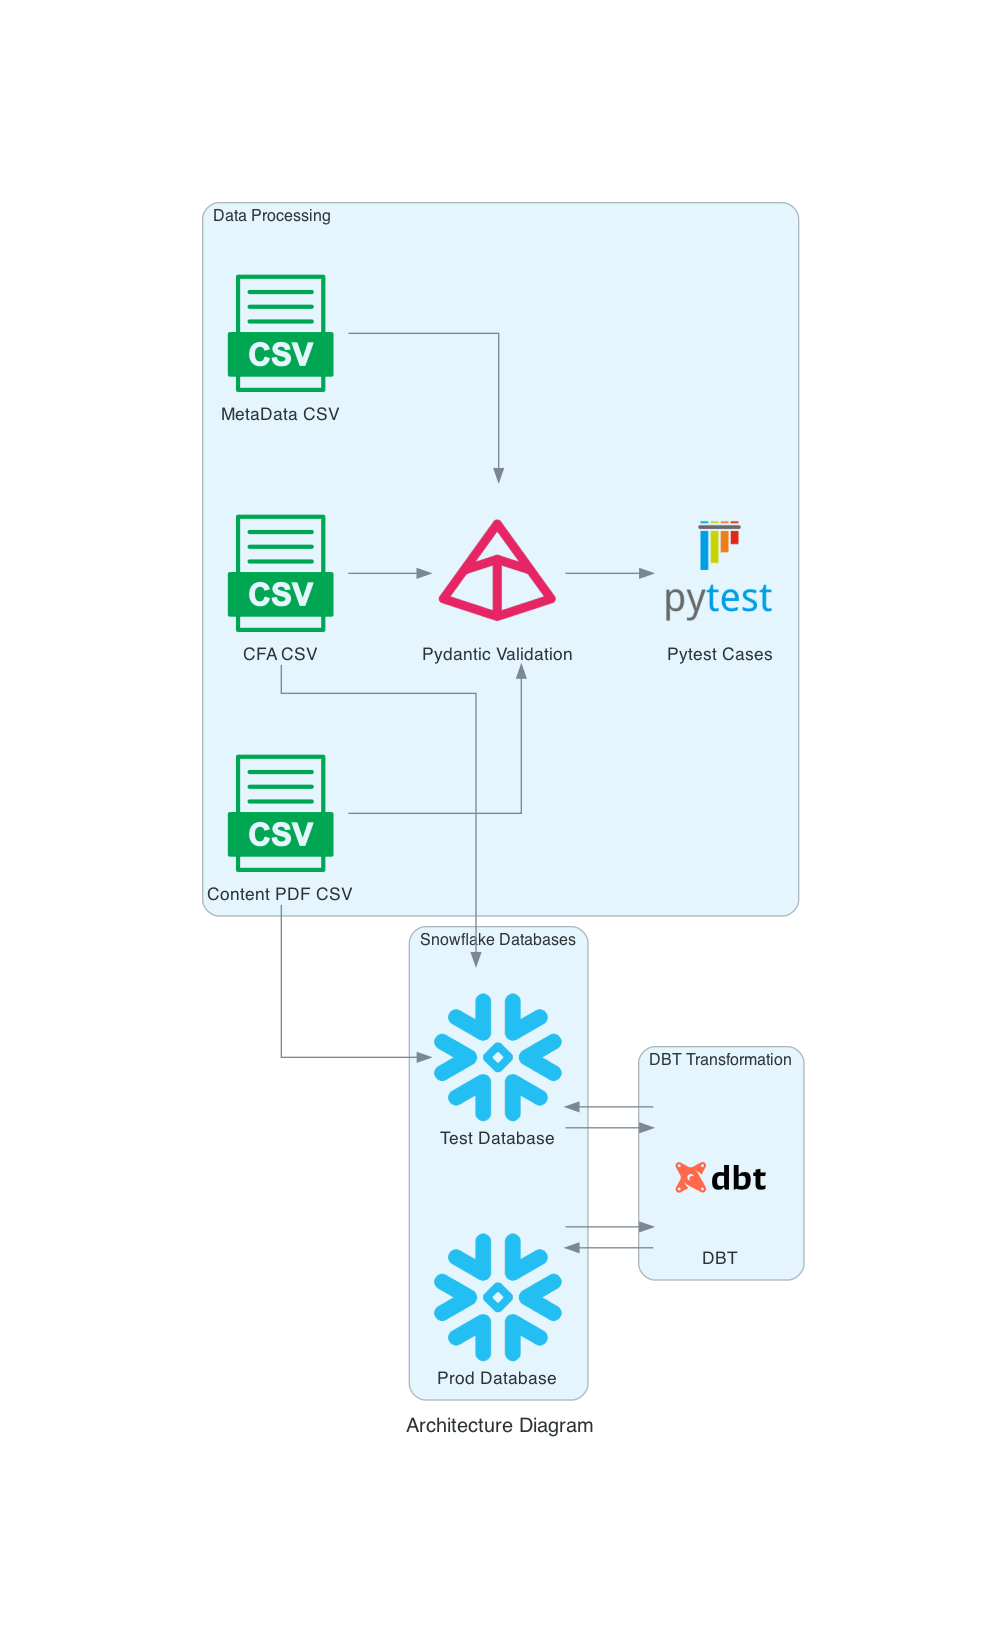

In [3]:
from diagrams import Diagram, Cluster
from diagrams.custom import Custom
from diagrams.programming.language import Python

with Diagram("Architecture Diagram", show=False) as diag:
    with Cluster("Data Processing"):
        # Use a custom image for Pydantic Validation
        pydantic = Custom("Pydantic Validation", "../images/Pydantic.png")
        # Use a custom image for Pytest Cases
        pytest = Custom("Pytest Cases", "../images/pytest.png")

        # Use a custom image for the MetaDataPDFClass
        metadata_pdf_class = Custom("MetaData CSV", "../images/csv.png")
        url_class = Custom("CFA CSV", "../images/csv.png")
        content_pdf_class = Custom("Content PDF CSV", "../images/csv.png")

        # Connections for Pydantic Validation
        classes = [url_class, content_pdf_class]  # Removed metadata_pdf_class from this list

        class2 = [url_class, content_pdf_class, metadata_pdf_class]
        for cls in class2:
            cls >> pydantic
        pydantic >> pytest

    with Cluster("Snowflake Databases"):
        # Custom images for Test and Development Snowflake databases
        test_snowflake = Custom("Test Database", "../images//snowflake.png")
        dev_snowflake = Custom("Prod Database", "../images//snowflake.png")
        for cls in classes:  # Update based on the new list excluding MetaDataPDFClass
            cls >> test_snowflake

    with Cluster("DBT Transformation"):
        # Custom image for DBT
        dbt = Custom("DBT", "../images//dbt.png")


        test_snowflake >> dbt
        dbt >> test_snowflake

        dev_snowflake >> dbt
        dbt >> dev_snowflake
        
diag